## Research Question

The research question I am trying to answer in this assignment is **Is there any relationship between variables mpg (miles per gallon) of a car and cylinders (number of cylinders) the car have?** I have taken the dataset [auto-mpg dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) from UCI Machine Learning Repository.

The variable **mpg** is my response variable which is continuous quantitative variable and the **cylinders** is the explanatory variable which is a categorical variable. So to test the relationship between these two variables, I need to perform the ANOVA Test.

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

## Loading the data

In [2]:
data = pd.read_csv("auto-mpg.data", delim_whitespace=True, header=None, usecols=[0,1], names=['mpg', 'cylinders'], 
                   dtype={'mpg':np.float64, 'cylinders':'category'})

## Summarizing the data

In [3]:
data.shape

(398, 2)

In [4]:
data.head(n=3)

,mpg,cylinders
0,18.0,8
1,15.0,8
2,18.0,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
mpg          398 non-null float64
cylinders    398 non-null category
dtypes: category(1), float64(1)
memory usage: 3.6 KB


In [6]:
data.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [7]:
# removing the unnecessary variable
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

## Setting Hypothesis

As we are testing the relationship between the variables **mpg** and **cylinders**, we can explain the null hypothesis as follows-

<ol><li>**Null Hypothesis:** There is nothing going on between the variables, there is no relationship between the two variables, in mathematical terms \begin{align}
\\H_0: \mu_3 = \mu_4 = \mu_5 = \mu_6 = \mu_8 
\end{align}</li><br><li>**Alternate Hypothesis:** There is something going on between the explanatory and response variable, or there is a relationship between the two, in mathematical terms \begin{align}
\\H_A: \mu_3 \neq \mu_4 \neq \mu_5 \neq \mu_6 \neq \mu_8
\end{align}</li></ol>

## Visualizing data

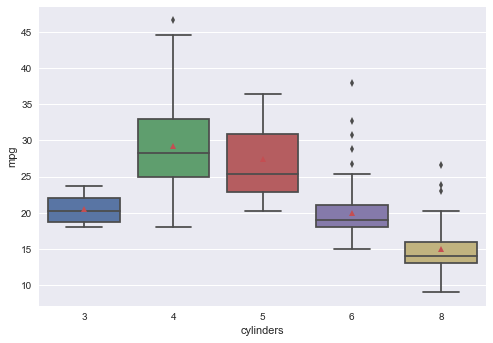

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['cylinders'], y=data['mpg'], showmeans=True)
plt.show()

From the above plot, it is clearly visible that the mean (triangular shape in red color) of the group with 8 number of cylinders does not overlap with another group means. We can now say that we have evidence against the null hypothesis and the variables are related to each other. But lets prove this by performing the ANOVA Test.

## ANOVA F Test

In [9]:
# using ols function for calculating the F-statistic and associated p value
model = smf.ols(formula='mpg ~ cylinders', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sat, 23 Sep 2017   Prob (F-statistic):           3.68e-85
Time:                        15:04:01   Log-Likelihood:                -1180.8
No. Observations:                 398   AIC:                             2372.
Df Residuals:                     393   BIC:                             2392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.5500      2.366      8.

As we can observe from the above table, the F-statistic is very high at 172.6 with the very very low p-value. So, we can reject our null hypothesis and conclude that there is a relationship between the categorical predictor variable cylinder (number of cylinders in the car) and quantitative target variable mpg (mileage of the car).

## Post Hoc Analysis

Now we have evidence against the null hypothesis and proved that there is a relationship between number of cylinders and miles per gallon of a car, we need to check which which number of cylinders effect mileage of car the most. In other words, mpg for which number of cylinders are significantly different from each other. To do this, we need to perform post-hoc analysis of the above ANOVA Test.

In [10]:
mc1 = multi.MultiComparison(data['mpg'], data['cylinders'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  3      4     8.7368   2.1903  15.2833   True 
  3      5     6.8167  -3.0867   16.72   False 
  3      6    -0.5643  -7.2001   6.0715  False 
  3      8    -5.5869  -12.1948  1.021   False 
  4      5    -1.9201  -9.4612   5.621   False 
  4      6    -9.3011  -10.982  -7.6201   True 
  4      8    -14.3237 -15.891  -12.7563  True 
  5      6     -7.381  -14.9997  0.2378  False 
  5      8    -12.4036 -19.998  -4.8091   True 
  6      8    -5.0226  -6.9289  -3.1163   True 
-----------------------------------------------


From the above result, it is evident that the cars with 4 and 8 number of cylinders differs significantly in mileage (mpg) when compares to cars with 3, 5 and 6 cylinders.